In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/ECE324/ECE324 Project 
%cd /content/drive/MyDrive/ECE324 Project

Mounted at /content/drive
/content/drive/MyDrive/ECE324 Project


In [ ]:
import json
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

import matplotlib.pyplot as plt

#Pulling in the Data

In [ ]:
df = pd.read_csv("cleanedData.csv", sep='\t')
# df = pd.read_csv("cleanedData_cuisinevec.csv", sep=',', index_col=False)
df.head()

,stars,delivery,takeout,Outdoor seating,hours,cost,location,cuisine
0,4.0,0,0,0,15.0,2,0,4
1,4.5,0,0,0,22.0,2,0,43
2,4.5,0,0,0,21.0,2,0,152
3,4.5,0,0,0,16.0,2,0,72
4,4.0,0,0,0,14.5,2,0,4


In [ ]:
# Perform train-test split
Y_col_name = 'stars'
X_cols_name = df.loc[:, df.columns != Y_col_name].columns
x_train, x_test, y_train, y_test = train_test_split(df[X_cols_name], df[Y_col_name], test_size=0.1, random_state=42)
# Random state will ensure the same train test split

In [ ]:
temp = df
temp = temp.sort_values("stars")
temp.head(25)

,stars,delivery,takeout,Outdoor seating,hours,cost,location,cuisine
154,1.0,0,0,0,18.0,2,0,14
575,1.5,0,0,0,4.0,2,4,58
476,2.0,0,0,0,18.0,2,4,4
570,2.0,0,0,0,1.0,2,4,58
981,2.0,0,0,0,21.0,2,2,58
905,2.5,0,0,0,20.0,3,2,11
1011,2.5,0,0,0,18.0,2,2,152
591,2.5,0,0,0,21.5,1,4,4
1015,2.5,0,0,0,23.0,2,2,2
963,2.5,0,0,0,2.0,3,2,164


In [ ]:
print(x_train.count())
print(y_train.count(), '\n')
print(x_test.count())
print(y_test.count())

delivery           927
takeout            927
Outdoor seating    927
hours              927
cost               927
location           927
cuisine            927
dtype: int64
927 

delivery           103
takeout            103
Outdoor seating    103
hours              103
cost               103
location           103
cuisine            103
dtype: int64
103


In [ ]:
x_train

,delivery,takeout,Outdoor seating,hours,cost,location,cuisine
806,0,0,0,21.0,2,5,2
168,0,0,0,22.0,2,0,123
590,0,0,0,23.0,1,4,31
464,0,0,0,18.0,1,1,193
998,0,0,0,18.0,2,2,203
...,...,...,...,...,...,...,...
87,0,0,0,22.0,2,2,20
330,0,0,0,20.0,2,3,4
466,0,0,0,23.0,2,1,2
121,0,0,0,17.0,2,0,134


#Trying Linear Regression

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regr.coef_)

[ 0.00000000e+00  1.90819582e-17  3.46944695e-18  4.53974973e-03
 -6.15009570e-02 -5.93436879e-02 -2.25171949e-04]


In [ ]:
# Visulazing the relative importance of each column in the linear regr model
pd.DataFrame(regr.coef_, x_train.columns, columns = ['Coeff'])

,Coeff
delivery,0.000000e+00
takeout,1.908196e-17
Outdoor seating,3.469447e-18
hours,4.539750e-03
cost,-6.150096e-02
location,-5.934369e-02
cuisine,-2.251719e-04


In [ ]:
preds = regr.predict(x_test)
print(metrics.r2_score(y_test, preds))
print(np.array(y_test), '\n', preds)

0.03596751605365511
[4.5 4.5 4.5 4.5 3.5 3.5 3.  4.5 4.  4.  3.5 3.  4.  4.5 5.  3.  4.  3.5
 5.  4.  4.  4.  3.5 3.5 4.  4.  4.  4.  4.5 4.5 3.5 4.  4.5 3.5 3.5 4.
 4.5 4.  4.  4.  4.  4.  5.  3.5 4.5 5.  4.5 3.5 4.5 4.  3.  3.  4.5 4.
 4.  3.5 3.5 4.  5.  2.5 4.5 4.  4.5 4.  4.  4.  5.  4.5 4.5 4.  4.  4.
 4.5 4.5 5.  4.  3.  4.5 3.5 4.5 4.5 4.  3.5 4.  4.5 4.  4.5 4.5 4.5 4.5
 3.5 4.5 4.5 4.5 4.5 4.5 4.5 5.  4.5 4.  4.  3.5 5. ] 
 [4.38548198 4.32345563 4.45998827 4.08574576 4.16046084 4.29522985
 3.91419406 3.69415564 3.89369287 4.05894196 4.17104873 3.60770678
 3.92082352 4.51324021 4.38294775 3.76422104 3.90226086 4.30185348
 3.87474881 4.10704475 3.93718698 3.99992472 4.02729196 4.40250534
 4.03048089 4.15449088 4.71380896 4.33130908 4.05405495 4.14507547
 3.85297578 3.79210799 4.0548463  4.04706559 4.03957754 4.3963174
 3.76116906 3.93397839 4.0994485  3.88851937 4.43597234 4.19942869
 4.4299047  3.8628375  4.24353246 4.44389747 4.25605292 4.14475982
 4.04054383 4.19486254 3.88

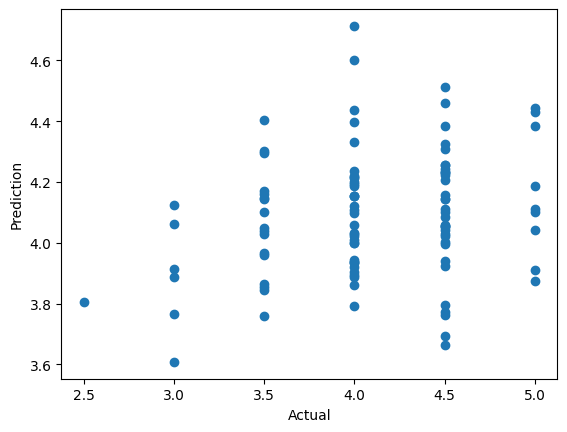

In [ ]:
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

# Multinomial Logistic Regression

In [ ]:
#Since we have half values, I multiply everything by 2 to get into the numbers to 
# fit the data type for logistic regression. Just have to remember to divide the 
# rating by 2 when making actual prediction.
y_train_logist = y_train * 2
y_test_logist = y_test * 2
y_train_logist
y_test_logist

31      9.0
109     9.0
136     9.0
88      9.0
918     7.0
       ... 
803     9.0
625     8.0
568     8.0
854     7.0
39     10.0
Name: stars, Length: 103, dtype: float64

In [ ]:
y_test_logist_binary = []
for e in y_test_logist:
  if e > 8:
    y_test_logist_binary.append(1)
  else:
    y_test_logist_binary.append(0)

y_test_logist_binary

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1]

In [ ]:
model = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(x_train, y_train_logist)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
pred = model.predict(x_test)
pred_binary = []

for e in pred:
  if e >= 8:
    pred_binary.append(1)
  else:
    pred_binary.append(0)
pred_binary

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_logist_binary, pred_binary)
confusion_matrix

array([[ 0, 59],
       [ 0, 44]])

In [ ]:
metrics.classification_report(y_test_logist, model.predict(x_test))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         5.0       0.00      0.00      0.00         1\n         6.0       0.00      0.00      0.00         6\n         7.0       0.00      0.00      0.00        17\n         8.0       0.36      0.86      0.51        35\n         9.0       0.55      0.31      0.40        35\n        10.0       0.00      0.00      0.00         9\n\n    accuracy                           0.40       103\n   macro avg       0.15      0.20      0.15       103\nweighted avg       0.31      0.40      0.31       103\n'

              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00        17
         8.0       0.36      0.86      0.51        35
         9.0       0.55      0.31      0.40        35
        10.0       0.00      0.00      0.00         9

    accuracy                           0.40       103
   macro avg       0.15      0.20      0.15       103
weighted avg       0.31      0.40      0.31       103


#Playing around with the data

In [ ]:
y_test.value_counts()

4.5    35
4.0    35
3.5    17
5.0     9
3.0     6
2.5     1
Name: stars, dtype: int64

In [ ]:
y_test.describe()

count    103.000000
mean       4.101942
std        0.534859
min        2.500000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: stars, dtype: float64